## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a patient will going to get a cardiac arrest.  Suppose that you are a cardiologist and you want to determine each patient's chance of getting a heart attack based on the body measurments. You have historical data from previous patients that you can use as a training set for logistic regression.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

Let's start by examining the data.

In [98]:
#!/usr/bin/env python3

##########################################################
# Copyright (c) Jesper Vang <jesper_vang@me.com>         #
# Created on 3 Aug 2021                                 #
# Version:	0.0.1                                        #
# What:  						                         #
##########################################################

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
np.set_printoptions(suppress=True, linewidth=130)


%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

print(f'the present working directory is: {os.getcwd()}')
DATA_PATH = os.path.join("data")
PROJECT_ROOT_DIR = "."

def load_model_data(data):
    pwd = os.getcwd() 
    filepath = os.path.join(pwd, DATA_PATH, data) 
    return pd.read_csv(filepath)     
    
data = load_model_data("heart.csv");



Pandas Version: 1.3.0
Numpy Version: 1.19.5
Matplotlib Version: 3.4.2
Scikit-learn Version: 0.24.2
Seaborn Version: 0.11.1
the present working directory is: /Users/jvang/Documents/Projects/Applied_AI_IT_Uni



## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names


In [99]:
features = np.shape(data)[0]
samples = np.shape(data)[1]
print(f"Shape of Dataset: {samples} x {features}\n\t* Number of samples:\t{samples}\n\t* Number of features:\t{features}")

Shape of Dataset: 14 x 303
	* Number of samples:	14
	* Number of features:	303


In [100]:
# 1. First few rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
# 2. Basic statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [102]:
# 3. info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [103]:
# 4. Column names
columns = data.columns.to_list()
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

Questions:

1. What is the dependent variable (column name)?

It is the 'target'.

2. What are the independent variables?

  The rest of the variables in the data set, 

  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

3. Should we normalize the data?

No, we don't need to normalize it.

4. What are the column data-types?

All columns are integers except for the "oldpeak", which is float. 

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?

First we need to create a sigmoid function.

Task:
1.  Implement the function

In [104]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

Make sure the function is correctly implemented.

Task:
1.  Plot the function.

/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

<AxesSubplot:>

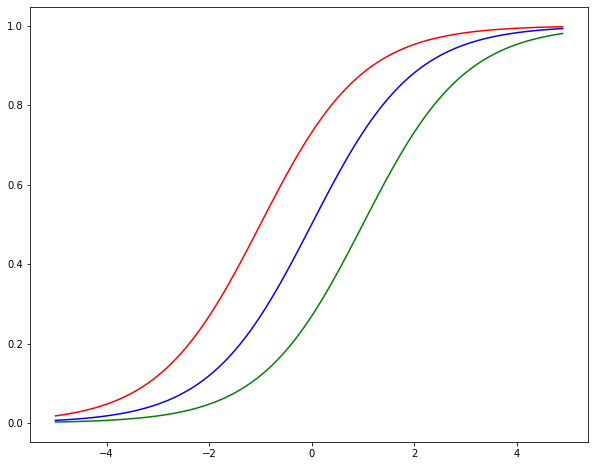

In [105]:
domain_x = np.arange(-5,5,0.1)
sns.lineplot(domain_x, sigmoid(domain_x*1+1), color="red")
sns.lineplot(domain_x, sigmoid(domain_x*1+0), color="blue") 
sns.lineplot(domain_x, sigmoid(domain_x*1-1), color="green")

Task:
1. Write the cost function to evaluate a solution.

In [106]:
def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression
        return np.dot(x, theta)

In [107]:
def probability(theta, x):
        # Calculates the probability that an instance belongs to a particular class
        return sigmoid(net_input(theta, x))

In [108]:
# def cost_function(x, y, Theta):
#     n = x.shape[0] # number of samples
#     h = sigmoid(np.dot(x, Theta))
#     return -(1.0 / n) * np.sum(y * np.log(h) + (1.0 - y) * np.log(1.0 - h))

def cost_function(x, y,theta) ->float:
        # Computes the cost function for all the training samples
        m = x.shape[0]
        return float(-(1 / m) * np.sum(
            y * np.log(probability(theta, x)) + (1 - y) * np.log(
                1 - probability(theta, x))))

Task:
1. Separate the data to `X` and `y` arrays.
2. Separate the training set and evaluation set.

In [109]:
# The dependent variable is selected as y
y = data["target"]
# The independent variables are selected. The address is discarted, as it is strings and does not make sense to include in the linear regression
x = data.drop(["target"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Task:
1. Check the shape of our arrays to make sure everything looks good.

In [110]:
print(f"Shape: x_train {x_train.shape} x_test: {x_test.shape}")
print(f"Shape: y_train {y_train.shape} y_test: {y_test.shape}")

Shape: x_train (242, 13) x_test: (61, 13)
Shape: y_train (242,) y_test: (61,)


Task:
1. Compute the cost for our initial solution (eyeball the initial value, e.g. zero).

In [111]:
#variables = x_train.shape[1]
theta = np.zeros((x_train.shape[1]))
cost_ = cost_function(x_train, y_train, theta)
print(f'The initial cost is: {cost_:.2f}')

The initial cost is: 0.69


Task:
  Implement a function to compute the gradient (parameter updates) given our training data, labels, and model parameters.

In [112]:
# def gradient(x, y, Theta) -> float:
#     # Computes the gradient of the cost function at the point theta
#     n = x.shape[0]  # number of samples
#     h = sigmoid(np.dot(x, Theta))
#     return 1.0 / n * np.dot(x.T, (h - y))

 
def gradient(x, y, theta):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [116]:
mu = 0.00005  # stepsize
new_cost = 0
m = 200000
i = 0

# We update the betas untill the new cost does not decrease OR we reach m iterations
while (new_cost < cost_) and (i < m):
    cost_ = cost_function
    i += 1
    gd_theta = gradient(x_train, y_train, theta)
    updated_weights = theta - gd_theta * mu
    new_cost = cost_function(x_train, y_train, updated_weights)

    if i % (m / 30) == 0:
        print(new_cost)
    theta = updated_weights

TypeError: '<' not supported between instances of 'int' and 'function'

Task:
1. Calculate the cost for the optimized parameters

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(f"Accuracy of logistic regression classifier on test set: {logreg.score(x_test, y_test):.2f}")

In [ ]:
print(logreg.coef_)
cost(x_train, y_train, logreg.coef_[0])

Task:
1. Write a function that will output predictions for a dataset X using our learned parameters.
2. Use this function to score and print the training accuracy of our classifier.

In [ ]:
def predict(x, Theta):
  return sigmoid(np.dot(x, Theta))

In [ ]:
# Hint: Accuracy is calculated  like: correctly classified samples / all samples
pred = np.round(predict(x_test, updated_weights))
accuracy = (y_test == pred).sum() / float(len(y_test))
print(f"The accuracy is: {accuracy}")